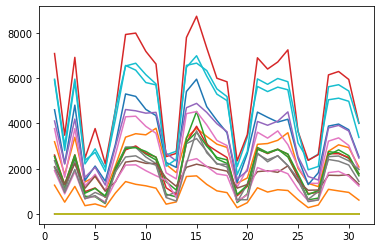

In [2]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt

def split_date():
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAP_2021/Data/Helsingin_pyorailijamaarat.csv', sep=';')
    df.dropna(how='all', inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    df_date = df["Päivämäärä"].str.split(expand=True)
    df_date.columns = ['Weekday', 'Day', 'Month', 'Year', 'Hour']
    weekdays = {'ma': 'Mon','ti': 'Tue','ke': 'Wed','to': 'Thu','pe': 'Fri','la': 'Sat','su': 'Sun'}
    months = {'tammi': 1,'helmi': 2,'maalis': 3,'huhti': 4,'touko': 5,'kesä': 6,'heinä': 7,'elo': 8,'syys': 9,'loka': 10,'marras': 11,'joulu': 12}
    df_weekday = df_date['Weekday'].map(weekdays)
    df_date['Weekday'] = df_weekday
    df_month = df_date['Month'].map(months)
    df_date['Month'] = df_month
    df_day = df_date['Day']
    df_date['Day'] = df_day
    df_year = df_date['Year']
    df_date['Year'] = df_year
    df_hour = df_date['Hour'].map(lambda x: x[0:2])
    df_date['Hour'] = df_hour
    df_date = df_date.astype({'Weekday': object, 'Day': int, 'Month': int, 'Year': int, 'Hour': int})
    return (df_date, df)

def split_date_continues():
    x, df = split_date()
    df.dropna(how='all', axis=1, inplace=True)
    df = df.iloc[:,1:]
    conc = pd.concat([x, df], axis=1)
    return conc

def cyclists_per_day():
    df = split_date_continues()
    df = df.drop(["Weekday", "Hour"], axis=1)
    df_gr = df.groupby(["Year", "Month", "Day"]).sum()
    return df_gr

def main():
    df = cyclists_per_day()
    df_pl = df.loc[(2017,8), :]
    plt.plot(df_pl)
    plt.show()

if __name__ == "__main__":
    main()